In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/home/krista/anaconda3/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
#     home = '/Users/67981492/'
    home = '/Users/krista/'

In [3]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [4]:
all_obs_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [14]:
all_obs_data.head(10)

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,...,epoch_trial_zero_idx,epoch_trial_one_idx,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,761,0.000000,0.000000,2.528877,...,0,1,0,1,0.305556,36,111,111,111,1
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,761,1.390214,0.149207,0.000000,...,1,2,1,2,0.305556,36,111,112,112,0
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,761,0.792372,0.196591,0.000000,...,2,3,2,3,0.305556,36,111,112,111,1
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,761,0.532802,0.226667,0.000000,...,3,4,3,4,0.305556,36,111,112,112,0
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,761,0.391376,0.251982,0.000000,...,4,5,4,5,0.305556,36,111,112,111,1
5,0.268538,-0.139394,0.139394,0,-1.000000,0.518539,761,0.302804,0.275119,3.036967,...,5,6,5,6,0.305556,36,111,111,111,1
6,0.035630,-0.027685,0.027685,0,-1.000000,0.768538,761,1.408409,0.604046,0.000000,...,6,7,6,7,0.305556,36,111,112,111,1
7,0.785155,-0.804363,0.804363,0,-1.000000,0.535630,761,0.571150,0.635969,4.661588,...,7,8,7,8,0.305556,36,111,111,111,1
8,0.352873,0.064818,-0.064818,0,-1.000000,1.285155,761,4.114561,1.314367,-0.099227,...,8,9,8,9,0.305556,36,111,111,111,1
9,0.206726,-2.800194,2.800194,0,-0.935182,0.852873,761,0.822059,1.379872,4.103838,...,9,10,9,10,0.305556,36,111,111,112,0


In [15]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,...,epoch_trial_zero_idx,epoch_trial_one_idx,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,761,0.000000,0.000000,2.528877,...,0,1,0,1,0.305556,36,111,111,111,1
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,761,1.390214,0.149207,0.000000,...,1,2,1,2,0.305556,36,111,112,112,0
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,761,0.792372,0.196591,0.000000,...,2,3,2,3,0.305556,36,111,112,111,1
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,761,0.532802,0.226667,0.000000,...,3,4,3,4,0.305556,36,111,112,112,0
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,761,0.391376,0.251982,0.000000,...,4,5,4,5,0.305556,36,111,112,111,1


In [16]:
all_obs_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
       'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
       'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
       'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
       'epoch_trial_zero_idx', 'epoch_trial_one_idx',
       'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
       'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
       'p_id_accuracy'],
      dtype='object')

In [17]:
test_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [18]:
np.unique(all_obs_data.id_choice)

array([111, 112])

In [19]:
all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

In [20]:
all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

In [21]:
np.sum(((all_obs_data.id_choice == all_obs_data.p_id_solution) == 
all_obs_data.p_id_accuracy))

57600

In [22]:
all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

In [23]:
#use target choice as response 
#include correct target choice as stimulus 
all_obs_data = all_obs_data.rename(index=str, columns={"p_id_accuracy": "response", 
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response','rt', 'condition', 'subj_idx', 'ideal_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_obs_data = all_obs_data.rename(index=str, columns={'ideal_B': 'B'})
# all_obs_data = all_obs_data[(all_obs_data.rt<0.6)]
# all_obs_data.reset_index(drop=True, inplace=True)

In [24]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

,response,rt,condition,subj_idx,B,cpp
0,1,0.711570,hc,761,0.000000,0.099471
1,0,0.681410,hc,761,-1.241007,0.035079
2,1,0.767118,hc,761,-0.595781,0.023075
3,0,0.507209,hc,761,-0.306135,0.019881
4,1,0.656259,hc,761,-0.139394,0.018539


In [25]:
# def z_link_func(x, data=all_obs_data):
#     stim = (np.asarray(dmatrix('0 + C(s, [[1], [-1]])',
#                                {'s': data.stimulus.ix[x.index]}))
#     )
#     return 1 / (1 + np.exp(-(x * stim)))

In [26]:
# def v_link_func(x, data=all_obs_data):
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return x * stim

In [27]:
np.unique(all_obs_data.subj_idx), np.unique(all_obs_data.condition)

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [28]:
#these are no longer error flipped but stimulus flipped 
# all_obs_data = hddm.utils.flip_errors(all_obs_data)

In [29]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_obs_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [30]:
all_obs_data.columns

Index(['response', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

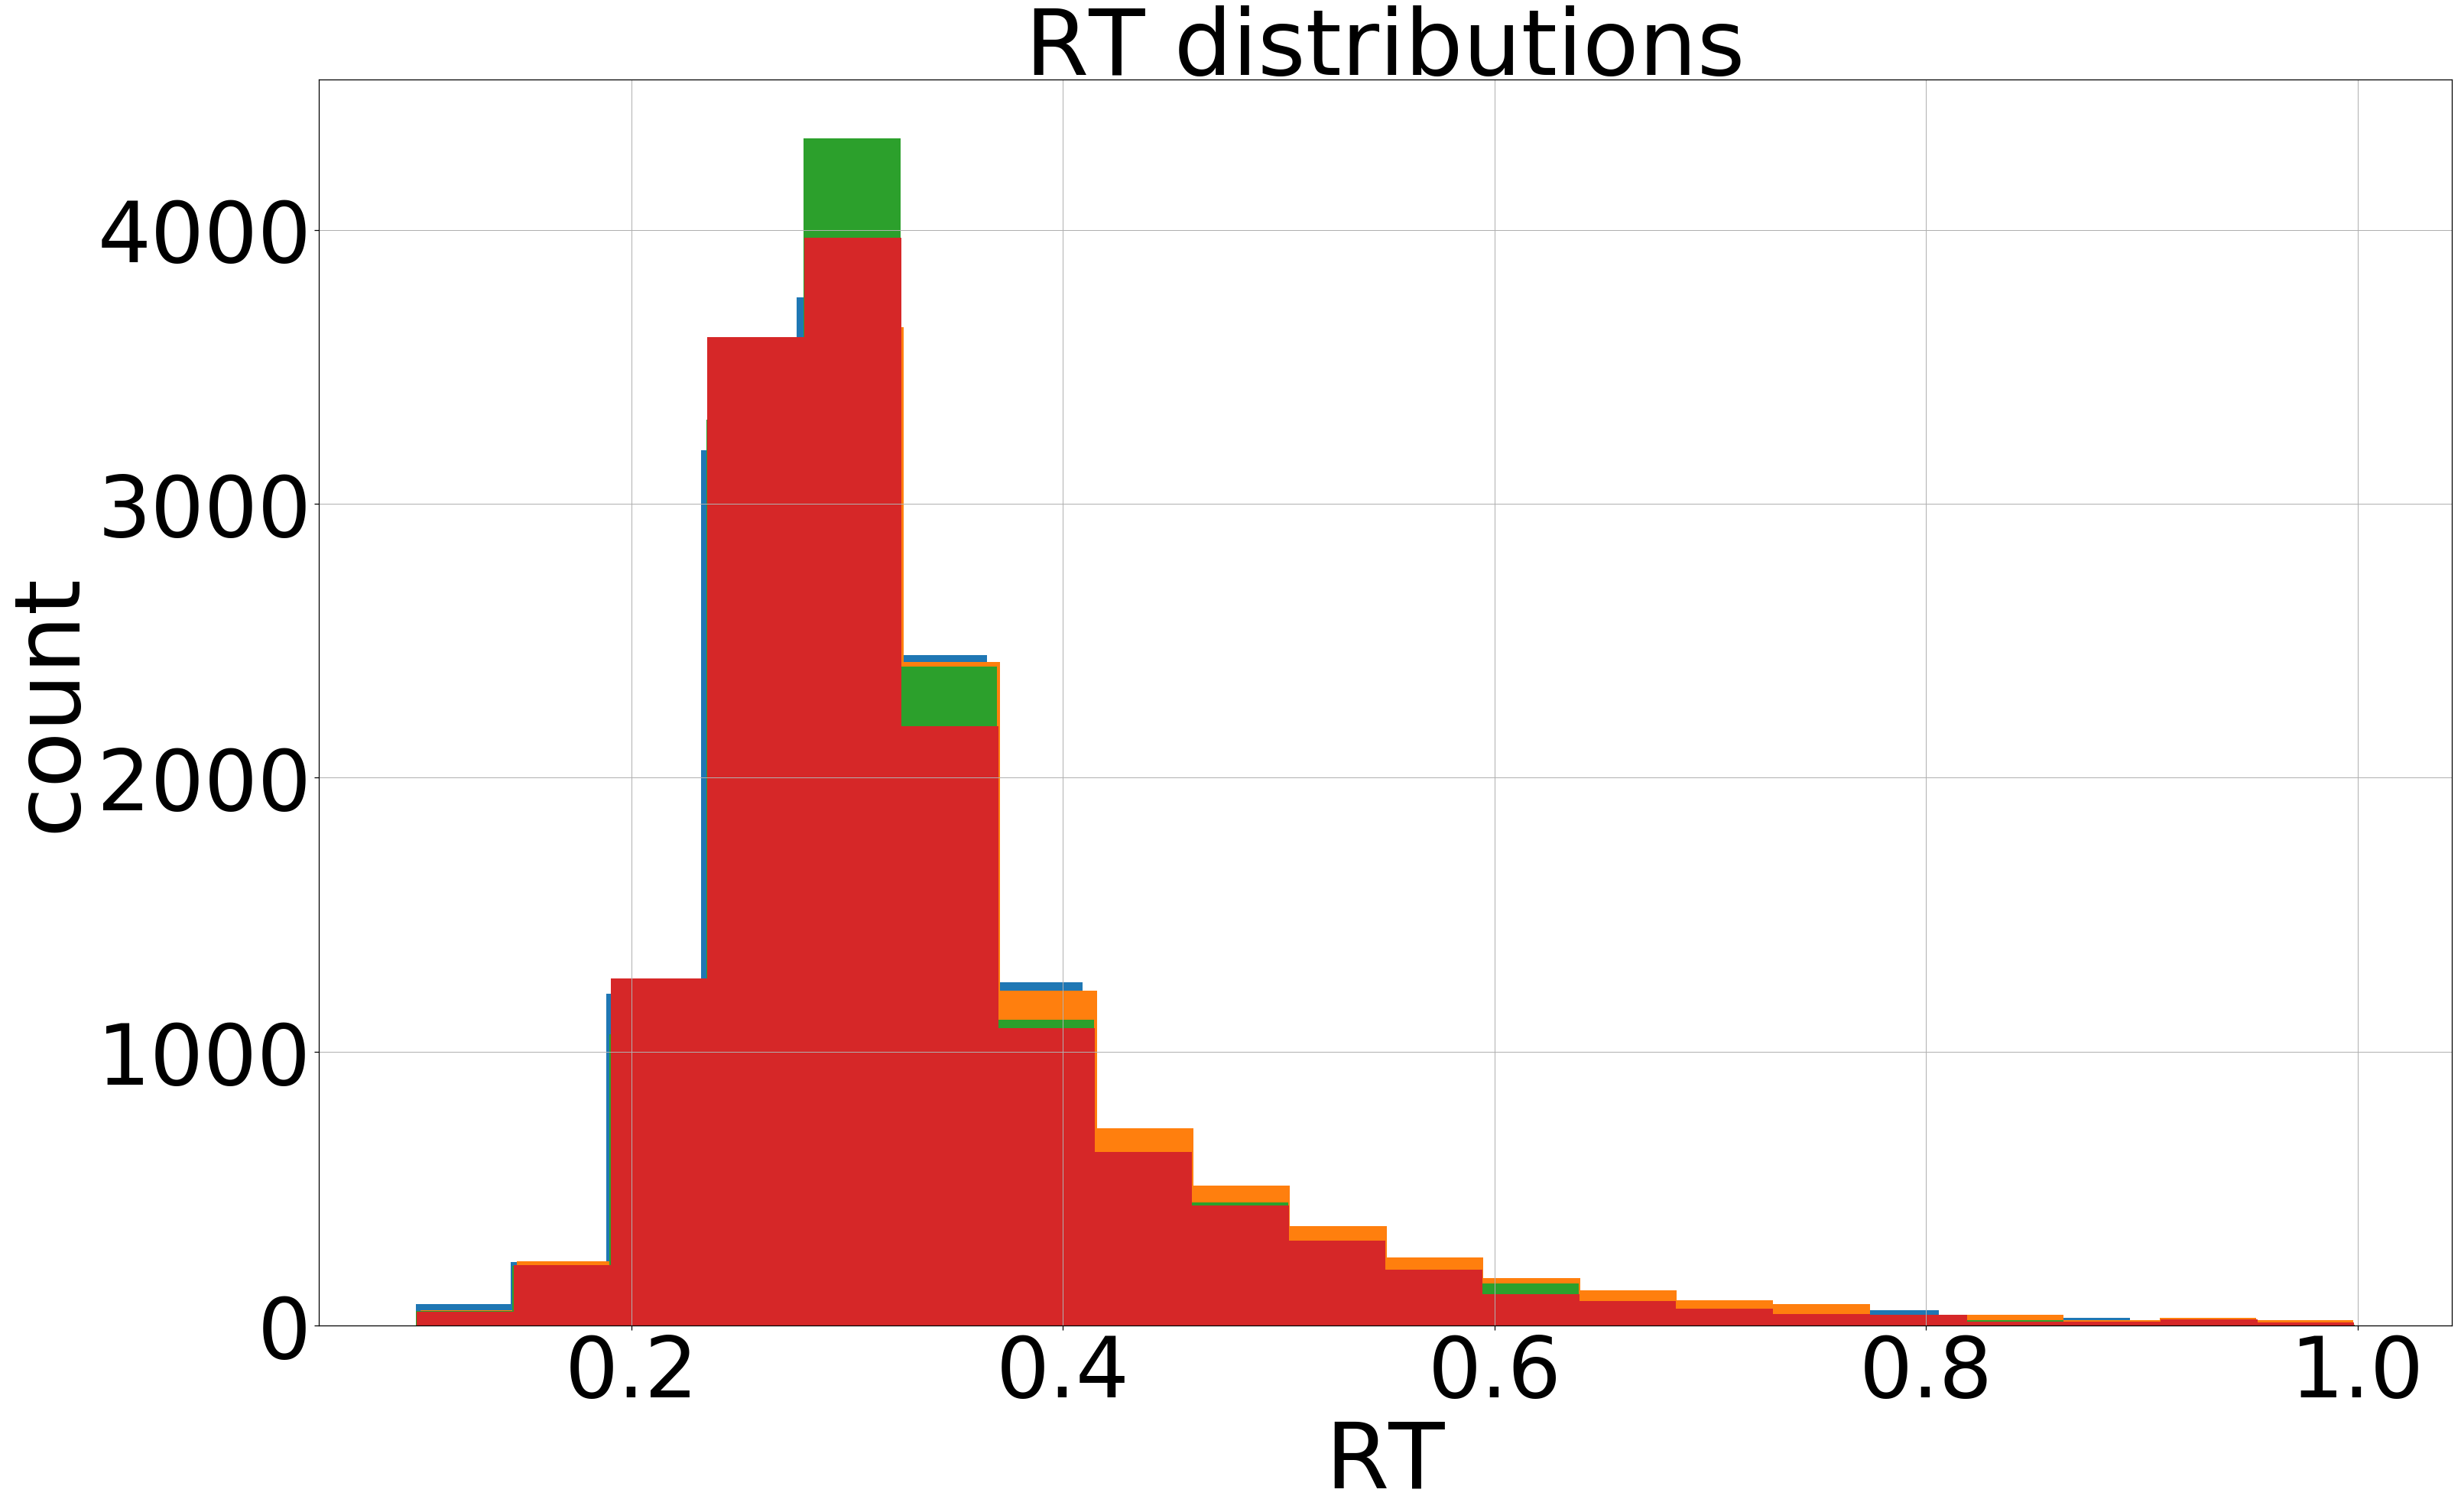

In [31]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [32]:
all_obs_data.columns

Index(['response', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

In [33]:
n_samples, n_burned_samples = 1000,50
n_samples_test, n_burned_samples_test, n_thin_test = 10, 2, 2

In [34]:
all_obs_data.head()

,response,rt,condition,subj_idx,B,cpp
0,1,0.711570,hc,761,0.000000,0.099471
1,0,0.681410,hc,761,-1.241007,0.035079
2,1,0.767118,hc,761,-0.595781,0.023075
3,0,0.507209,hc,761,-0.306135,0.019881
4,1,0.656259,hc,761,-0.139394,0.018539


In [35]:
#get increments 
start = 100
stop = 700 
increment = 100
n_trials = np.arange(start, stop, increment)
print(n_trials)

#could randomize the selection of trials while preserving temporal sequence (not always beginning from trial 0)
#but this is how the data would exist if there were only n trials.
t100 = all_obs_data.groupby('subj_idx').head(n_trials[0])
t200 = all_obs_data.groupby('subj_idx').head(n_trials[1])
t300 = all_obs_data.groupby('subj_idx').head(n_trials[2])
t400 = all_obs_data.groupby('subj_idx').head(n_trials[3])
t500 = all_obs_data.groupby('subj_idx').head(n_trials[4])
t600 = all_obs_data.groupby('subj_idx').head(n_trials[5])

[100 200 300 400 500 600]


In [36]:
t100.shape, t300.shape

((2400, 6), (7200, 6))

In [75]:
t_cpp_v_B_obs_reg_t100 = hddm.HDDM(t100,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t100.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t100.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1295.4 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [76]:
t_cpp_v_B_obs_reg_t200 = hddm.HDDMRegressor(t200,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t200.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t200.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1293.9 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [77]:
t_cpp_v_B_obs_reg_t300 = hddm.HDDMRegressor(t300,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t300.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t300.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1264.9 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [78]:
t_cpp_v_B_obs_reg_t400 = hddm.HDDMRegressor(t400,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t400.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t400.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1370.4 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [79]:
t_cpp_v_B_obs_reg_t500 = hddm.HDDMRegressor(t500,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t500.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t500.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1460.1 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [80]:
t_cpp_v_B_obs_reg_t600 = hddm.HDDMRegressor(t600,model_dict['t_cpp_v_B'], bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t600.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t600.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 1531.6 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [81]:
#send text when the script is done
from twilio.rest import Client
accountSid = 'AC2832bdf83bb5a2f150686d323b7a3440'
authToken = '70363f4f104ac88b8aefc6b7886fb989'
twilioClient = Client(accountSid, authToken)
myTwilioNumber = 6095422252
destCellPhone = 6094242780
myMessage = twilioClient.messages.create(body = "sensitivity analysis is done for observed data.",  from_=myTwilioNumber, to=destCellPhone)

ImportError: No module named 'twilio'

# Plot model fits

In [9]:
dics = [t_cpp_v_B_obs_reg_t100.dic, t_cpp_v_B_obs_reg_t200.dic, t_cpp_v_B_obs_reg_t300.dic,
       t_cpp_v_B_obs_reg_t400.dic, t_cpp_v_B_obs_reg_t500.dic, t_cpp_v_B_obs_reg_t600.dic]
m_names = ['100t', '200t', '300t', '400t', '500t', '600t']

In [11]:
winner = np.where(dics == min(dics))[0]
m_names[winner]

't_cpp & v_B'

In [84]:
len(dics)

#get std of parameters. mse with estimate at 600t? 

12

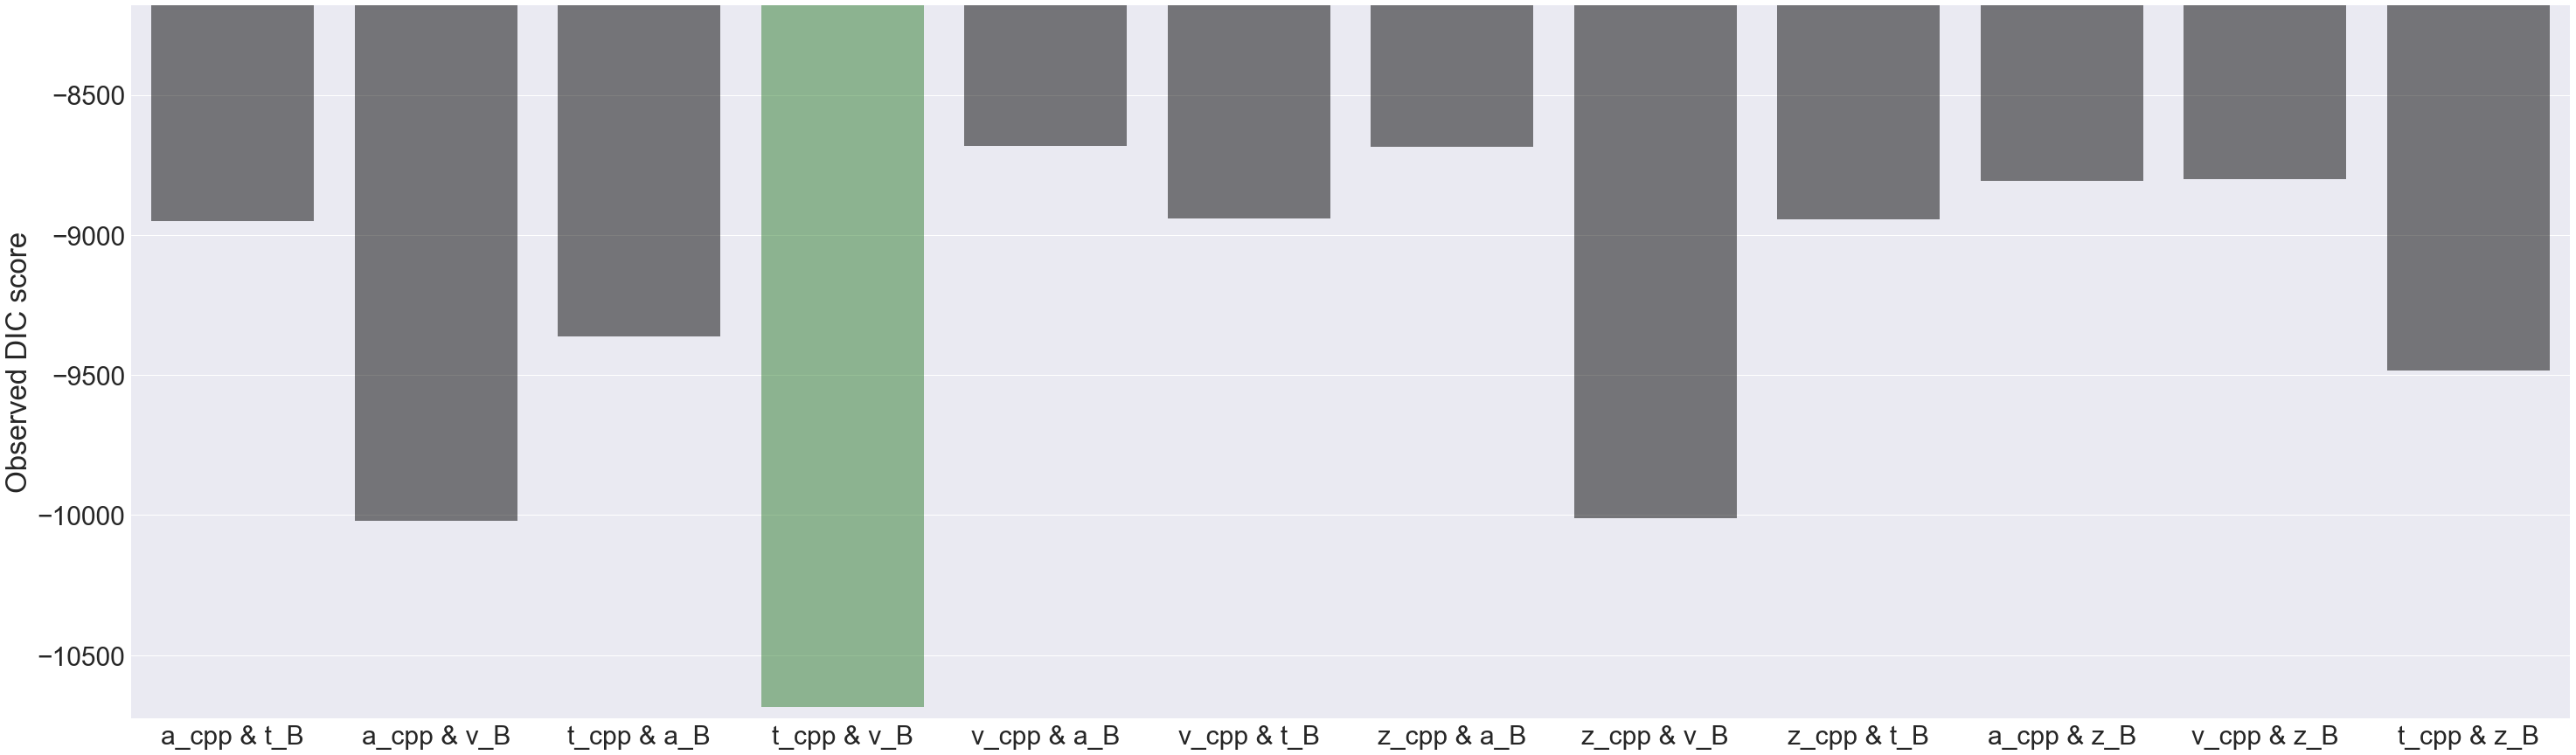

In [69]:
plt.figure(figsize=(50,15))
sns.set(font_scale=3)  

clrs = ["black" if (dic > min(dics)) else 'forestgreen' for dic in dics]
sns.barplot(m_names, dics, color='black', alpha=0.5, palette=clrs)
plt.ylim(min(dics) - 40, max(dics) + 500)
plt.ylabel('Observed DIC score')
# plt.title('All pairwise parameters and learning signals')
plt.savefig('observed_reg_dics.png', dpi=600)

# Plot posteriors of regression coefficients

In [13]:
#plot posteriors for winning model 
v_hc , v_hv ,  v_lc , v_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc , t_hv , t_lc , t_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [64]:
# #plot posteriors for gen model 
# v_hc_gen , v_hv ,  v_lc_gen , v_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
#                                                              'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
#                                                           'node']


# a_hc_gen , a_hv_gen , a_lc_gen , a_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 
#                                                              'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]'],
#                                                           'node']

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [67]:
##generative model
# hddm.analyze.plot_posterior_nodes([v_lc_gen , v_hc_gen  ])
# plt.xlabel('drift-rate regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of belief-> drift-rate effect')
# # plt.savefig('600a_drifa_conflict.pdf')

# hddm.analyze.plot_posterior_nodes([v_lv_gen  , v_hv_gen  ])
# plt.xlabel('drift-rate regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of belief-> drift-rate effect')
# # plt.savefig('600a_drifa_vol.pdf')

# hddm.analyze.plot_posterior_nodes([a_lc_gen  , a_hc_gen  ])
# plt.xlabel('non-decision time regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of cpp-> threshold effect')
# # plt.savefig('600a_bound_conflict.pdf')


# hddm.analyze.plot_posterior_nodes([a_lv_gen  , a_hv_gen  ])
# plt.xlabel('decision threshold regression coefficient')
# plt.ylabel('Posterior probability')
# plt.title('Posteriors of cpp-> threshold effect')
# # plt.savefig('600a_bound_vol.pdf')

Text(0.5,1,'Posteriors of cpp-> non-decision time effect')

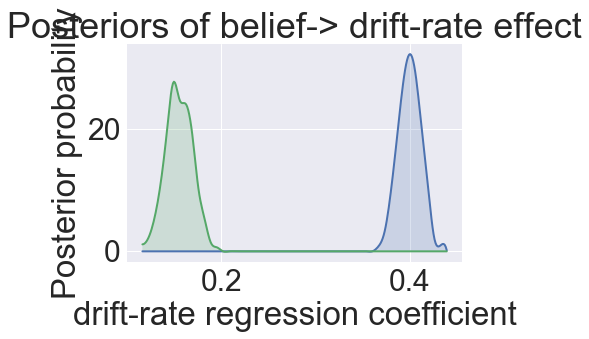

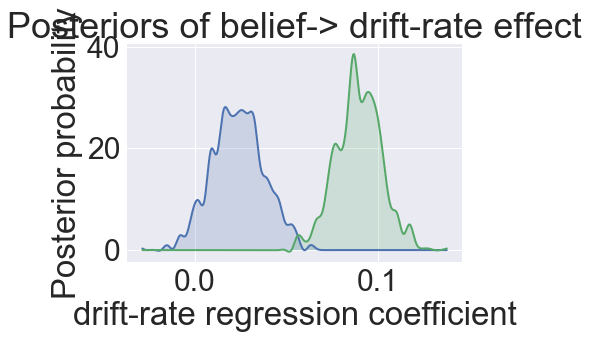

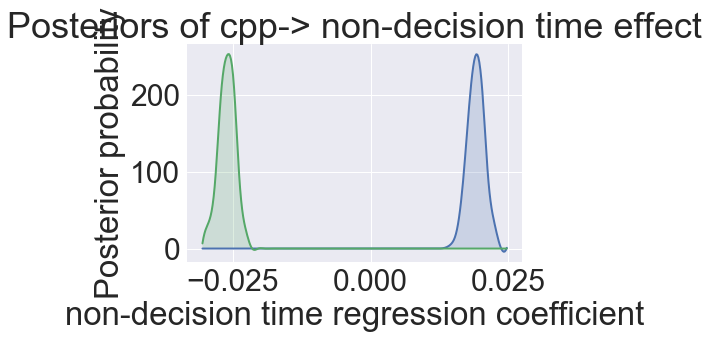

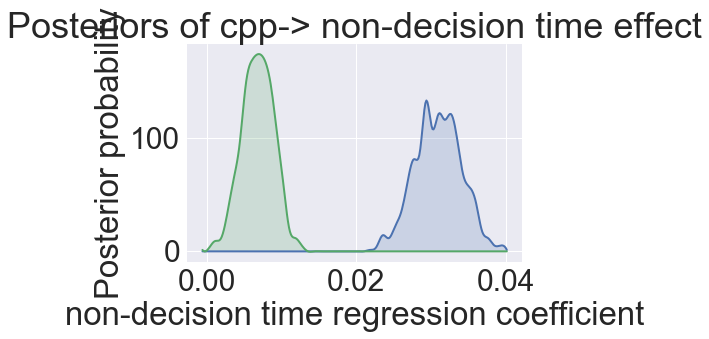

In [50]:
hddm.analyze.plot_posterior_nodes([v_lc , v_hc ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv , v_hv ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([t_lc , t_hc ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([t_lv , t_hv ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_vol.pdf')

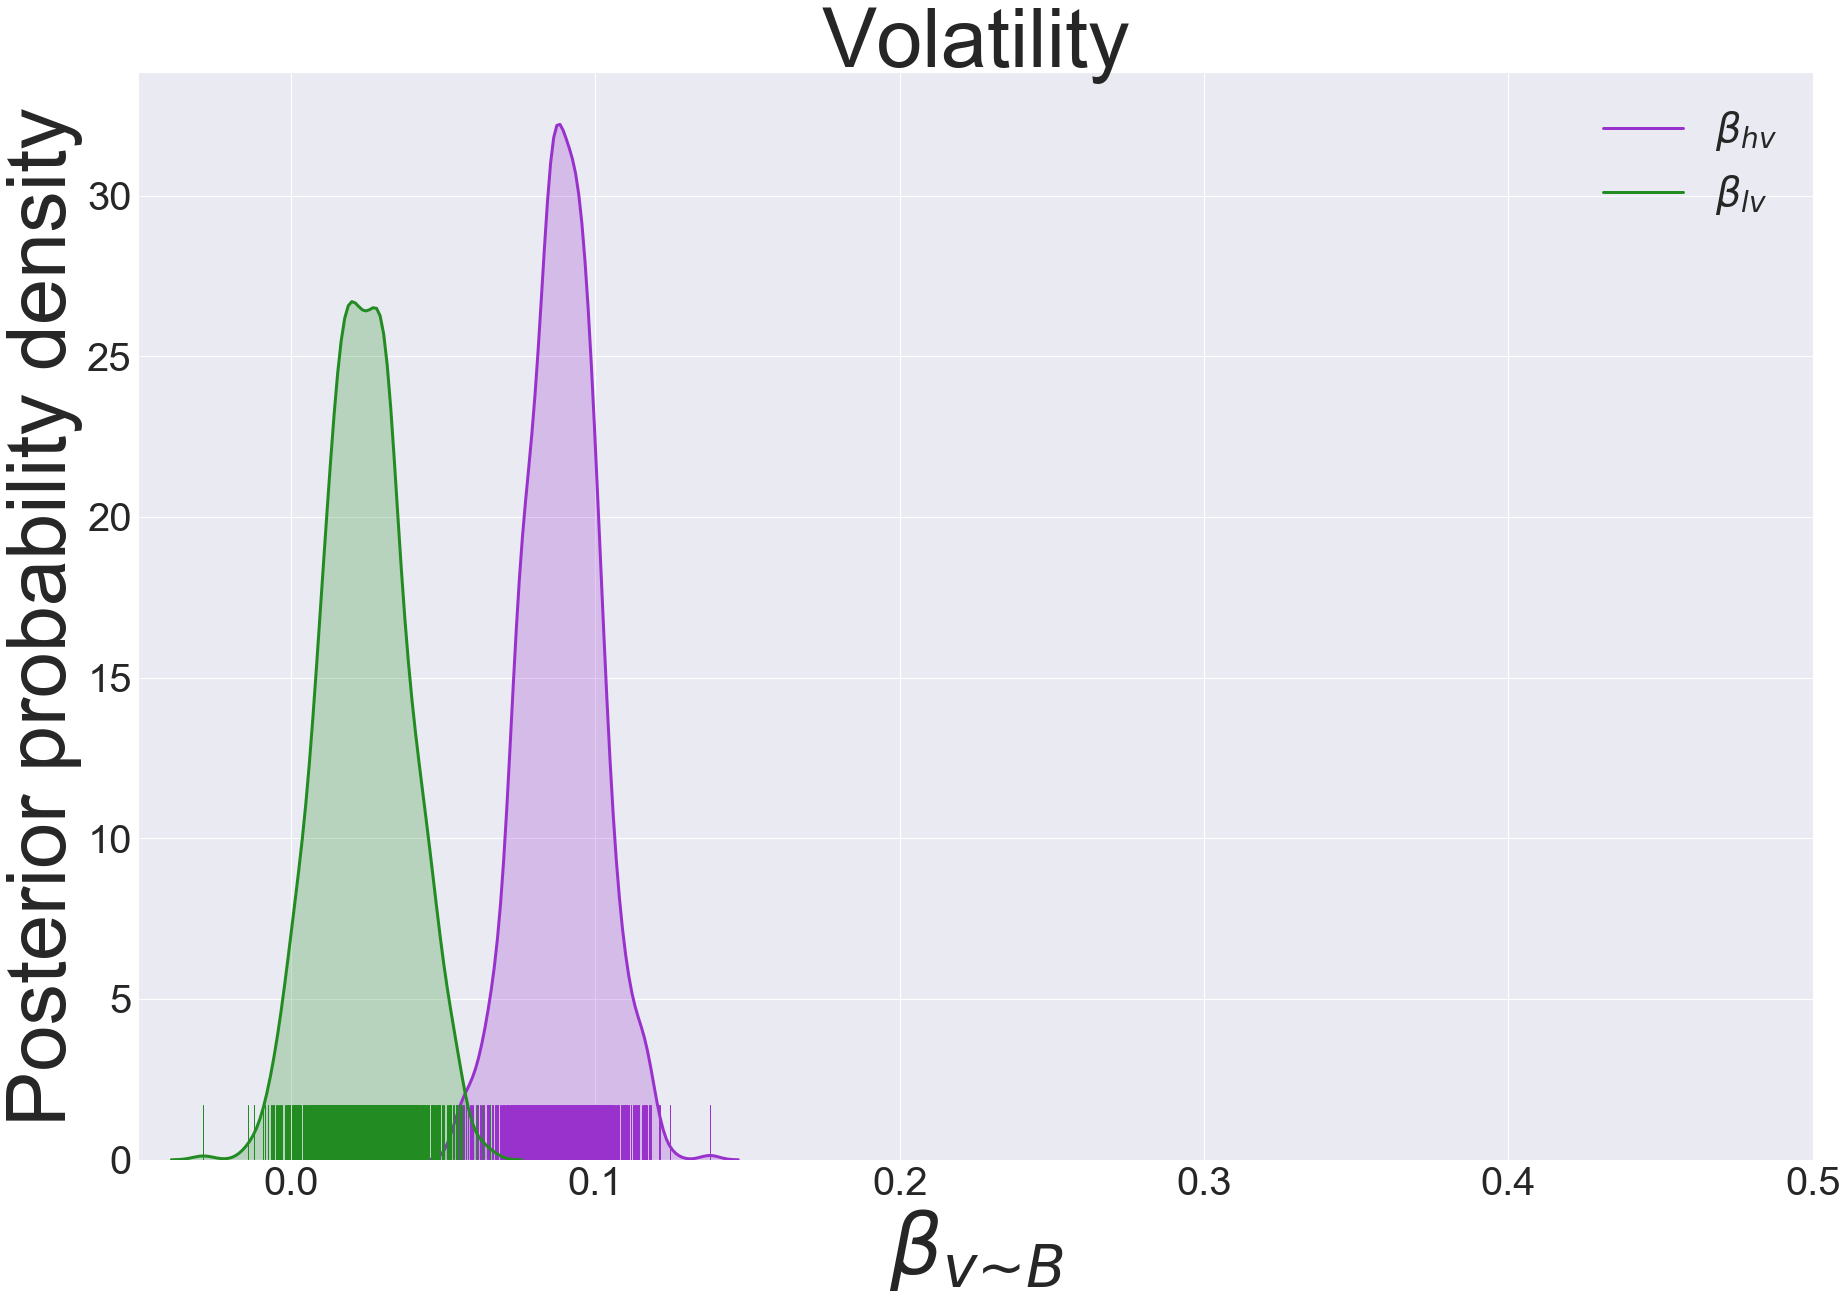

In [140]:
sns.set(font_scale=4)  # crazy big

plt.figure(figsize=(30,20))
sns.distplot(v_hv.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

plt.xlim([-.05,0.5]) 
plt.savefig('vB_betas_volatility_OBS.png', dpi=600)

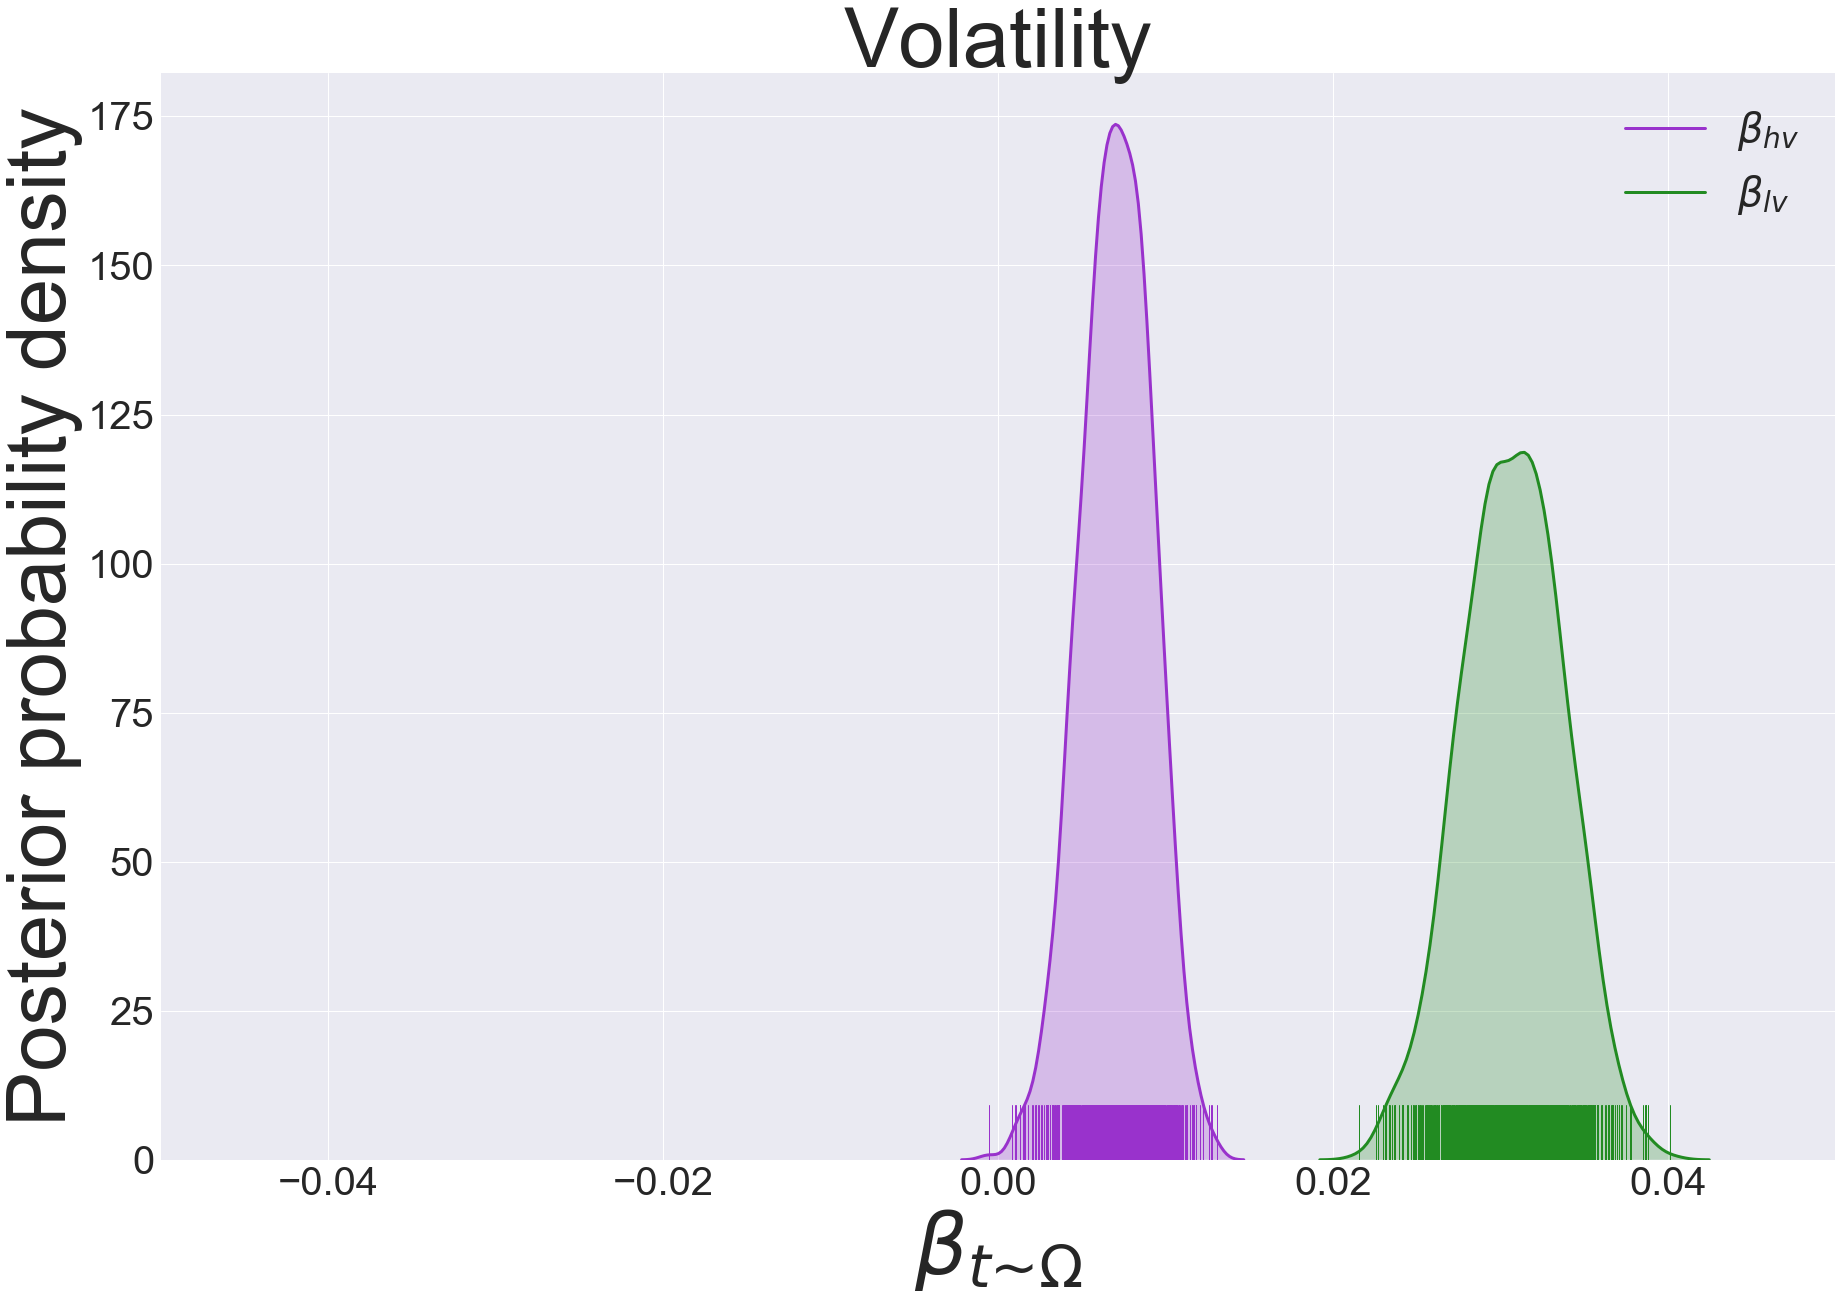

In [141]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hv.trace(), label=r'$\beta_{hv}$', hist=False,rug=True,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(t_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=True,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
plt.xlim([-0.05,0.05])
plt.savefig('tCPP_betas_vol_OBS.png', dpi=600)

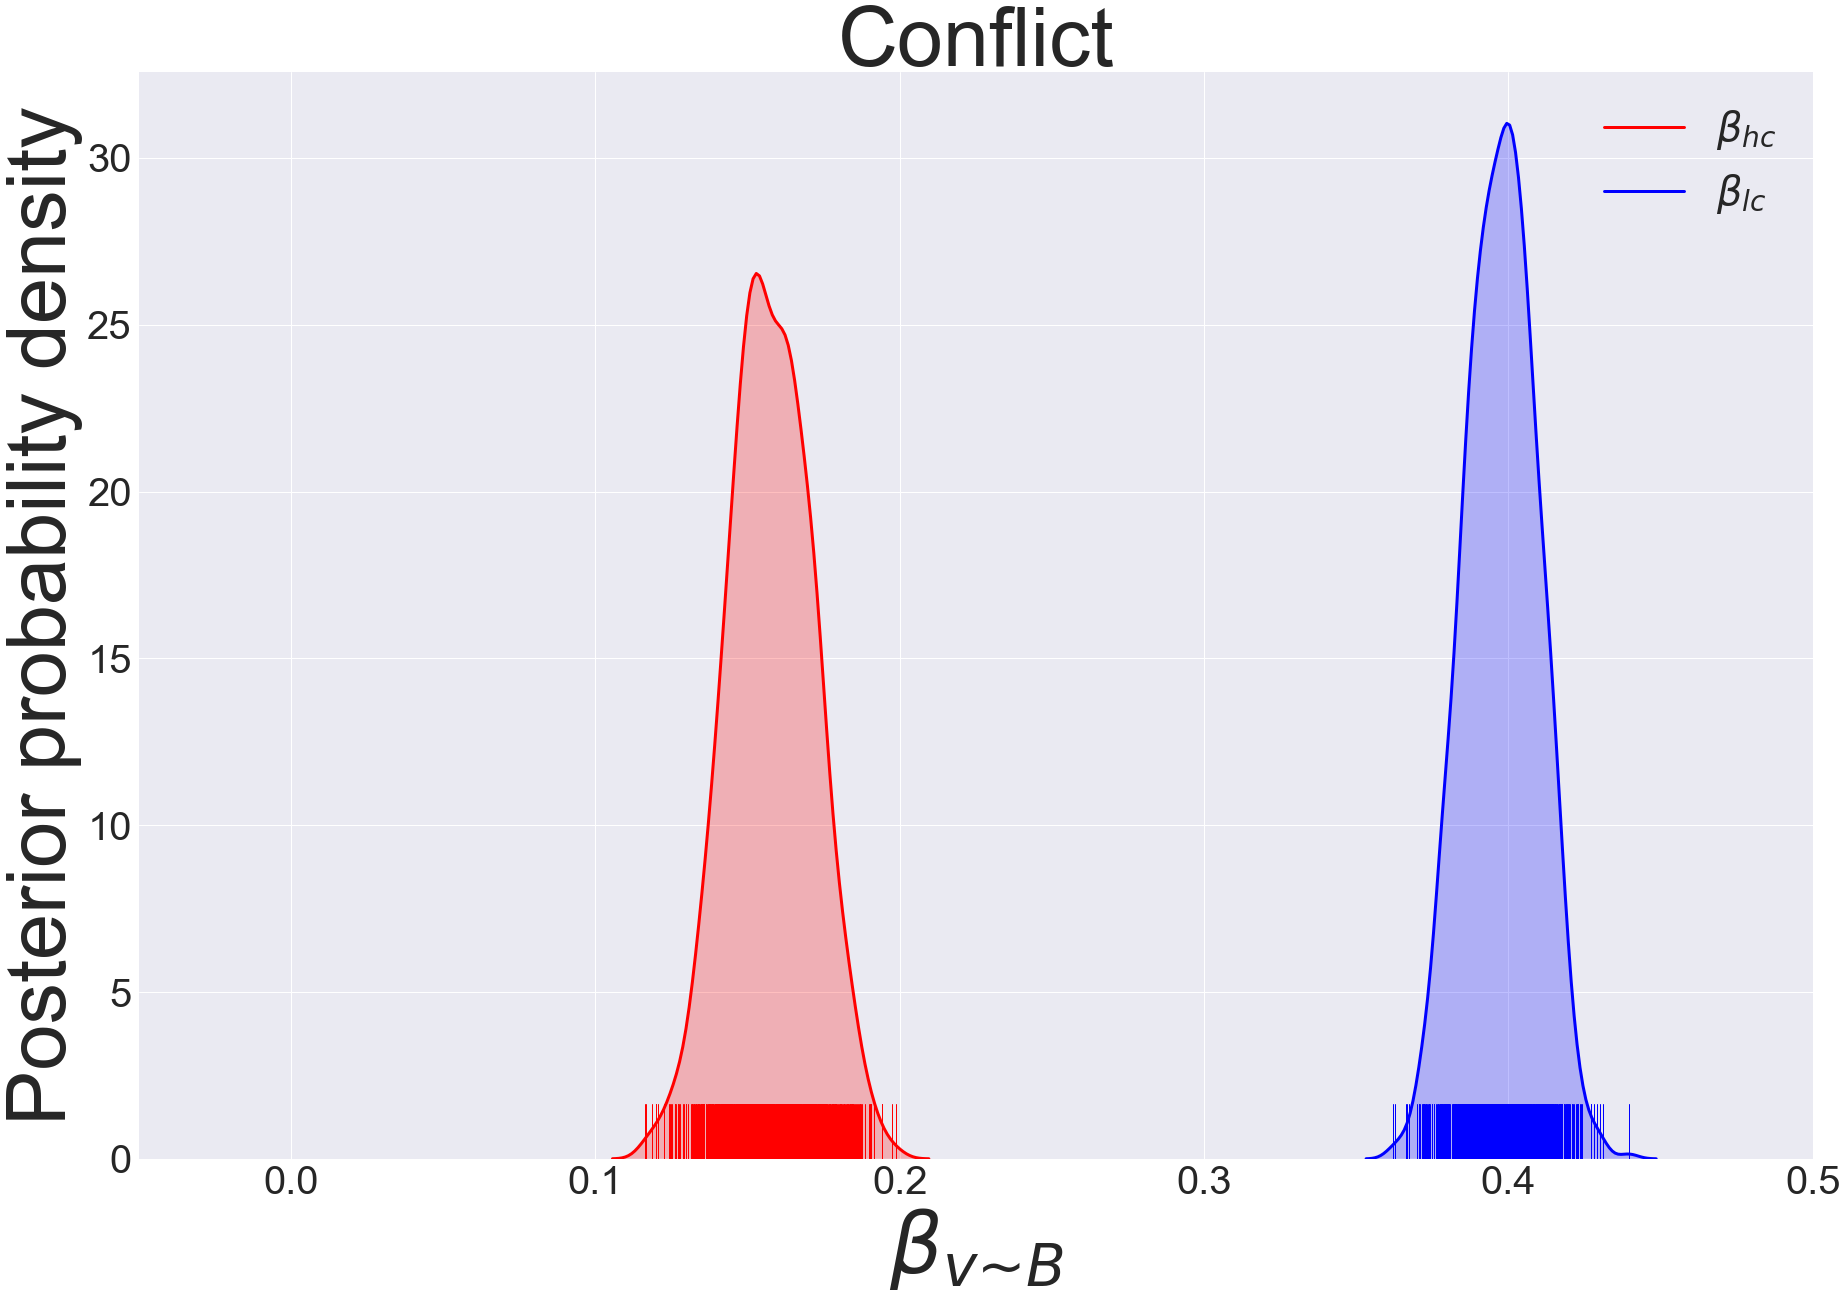

In [142]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(v_hc.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(v_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')
plt.xlim([-.05,0.5]) 
plt.savefig('vB_betas_conflict_OBS.png', dpi=600)

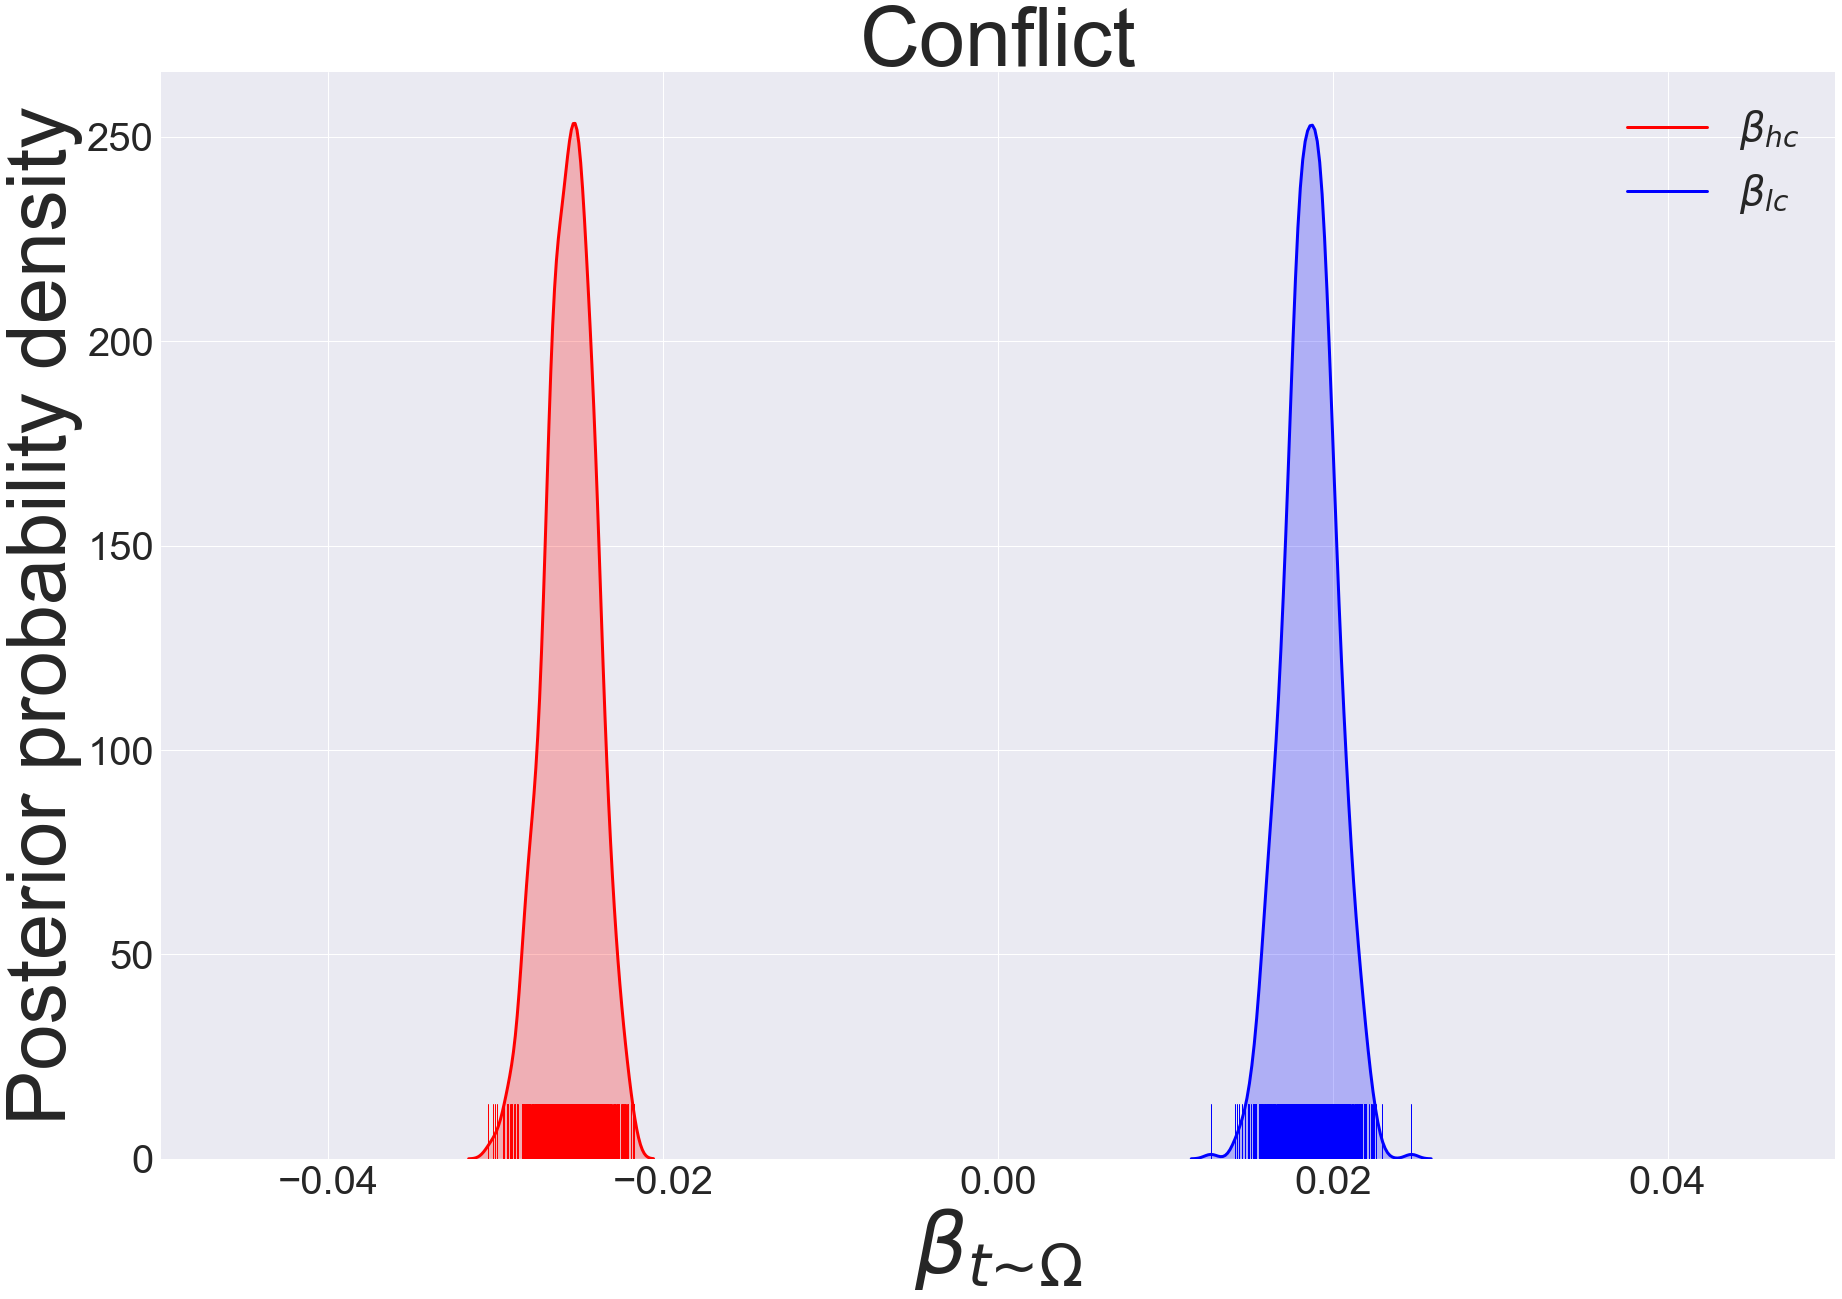

In [143]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hc.trace(), label=r'$\beta_{hc}$', hist=False,rug=True,color='red', kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(t_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=True,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
plt.xlim([-0.05,0.05])
plt.savefig('tCPP_betas_conflict_OBS.png', dpi=600)

# Extract the regression estimates 

In [ ]:
t_cpp_v_B_obs_reg.

In [73]:
a0 = t_cpp_v_B_obs_reg.nodes_db.ix[['a_Intercept'], 'mean'][0]


In [79]:
t_cpp_v_B_obs_reg.print_stats()

                              mean          std        2.5q        25q         50q         75q       97.5q       mc err
a                         0.999494    0.0208341    0.955793   0.985597    0.998902      1.0135     1.04067  0.000720579
a_std                     0.100597    0.0159001   0.0754238  0.0895099   0.0981998    0.109861    0.137251  0.000651573
a_subj.761                0.854881   0.00851902    0.838368   0.848737     0.85505    0.861003    0.871403  0.000279542
a_subj.762                0.973506   0.00878545    0.955757   0.967756    0.973625    0.979582    0.990295  0.000320341
a_subj.763                 1.05275   0.00960251     1.03434    1.04621     1.05292      1.0592     1.07131  0.000376766
a_subj.764                 1.01507   0.00941954    0.996973    1.00857     1.01527     1.02169      1.0325  0.000359251
a_subj.765                 1.12584    0.0103888     1.10689    1.11838      1.1257     1.13338     1.14592  0.000380979
a_subj.766                0.968387   0.0

In [47]:
v0 = t_cpp_v_B_obs_reg.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

In [48]:
t0 = t_cpp_v_B_obs_reg.nodes_db.ix[['t_Intercept'], 'mean'][0]
t_beta_hc = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0]
t_beta_lc = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0]
t_beta_hv = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0]
t_beta_lv = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0]

In [49]:
#make a copy of the observed data
all_obs_reg_data = all_obs_data.copy()
#include cps
all_obs_reg_data['cp_with_slow_fast'] = test_data.cp_with_slow_fast.values
all_obs_reg_data['epoch_trial_zero_idx'] = test_data.epoch_trial_zero_idx.values
all_obs_reg_data['shifted_epoch_trial_zero_idx'] = test_data.shifted_epoch_trial_zero_idx.values
all_obs_reg_data['epoch_n'] = test_data.epoch_n.values

# Calculate drift rates and non-decision times estimated from the regressions

In [82]:
np.mean(v0 + v_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['B'] )

0.32340957443427348

In [58]:
#store all of the regression estimates 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hc', 'v_reg'] = v0 + v_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lc', 'v_reg']  = v0 + v_beta_lc * all_obs_reg_data[all_obs_reg_data.condition=='lc']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hv', 'v_reg']  = v0 + v_beta_hv * all_obs_reg_data[all_obs_reg_data.condition=='hv']['B'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lv', 'v_reg']  = v0 + v_beta_lv * all_obs_reg_data[all_obs_reg_data.condition=='lv']['B'] 


# plt.plot(v_hc_trials[:600].values, label='hc')
# plt.plot(v_lc_trials[:600].values, label='lc')
# ax = plt.gca()
# ax.set_ylabel('Drift-Rate')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([-1.2,2])
# plt.show()

# plt.plot(v_hv_trials[:600].values, label='hv')
# plt.plot(v_lv_trials[:600].values, label='lv')
# ax = plt.gca()
# ax.set_ylabel('Drift-Rate')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([-1.2,2])
# plt.show()


In [59]:
all_obs_reg_data.loc[all_obs_reg_data.condition =='hc', 't_reg']  = t0 + t_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lc', 't_reg'] = t0 + t_beta_lc * all_obs_reg_data[all_obs_reg_data.condition=='lc']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='hv', 't_reg'] = t0 + t_beta_hv * all_obs_reg_data[all_obs_reg_data.condition=='hv']['cpp'] 
all_obs_reg_data.loc[all_obs_reg_data.condition =='lv', 't_reg'] = t0 + t_beta_lv * all_obs_reg_data[all_obs_reg_data.condition=='lv']['cpp'] 


# plt.plot(t_hc_trials[:600].values, label='hc')
# plt.plot(t_lc_trials[:600].values, label='lc')
# ax = plt.gca()
# ax.set_ylabel('Non-decision time')
# ax.set_xlabel('Trials')
# plt.ylim([.09,.15])
# ax.legend()
# plt.show()

# plt.plot(t_hv_trials[:600].values, label='hv')
# plt.plot(t_lv_trials[:600].values, label='lv')
# ax = plt.gca()
# ax.set_ylabel('Non-decision time')
# ax.set_xlabel('Trials')
# ax.legend()
# plt.ylim([.09,.15])
# plt.show()


# Store for further analysis

In [62]:
#print to csv
all_obs_reg_data.to_csv('/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/all_reg_obs_data.csv')

In [230]:
import pymc as pm
import numpy as np
import pymc.progressbar as pbar

def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

def _post_pred_generate(bottom_node, samples=500, data=None, append_data=True):
    """Generate posterior predictive data from a single observed node."""
    datasets = []
    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random()
        if append_data and data is not None:
            sampled_data.reset_index(inplace=True)  # Only modification of original Kabuki code
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

def post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True):
    results = {}

    # Progress bar
    if progress_bar:
        n_iter = len(model.get_observeds())
        bar = pbar.progress_bar(n_iter)
        bar_iter = 0
    else:
        print("Sampling...")

    if groupby is None:
        iter_data = ((name, model.data.ix[obs['node'].value.index]) for name, obs in model.iter_observeds())
    else:
        iter_data = model.data.groupby(groupby)

    for name, data in iter_data:
        node = model.get_data_nodes(data.index)

        if progress_bar:
            bar_iter += 1
            bar.update(bar_iter)

        if node is None or not hasattr(node, 'random'):
            continue # Skip

        ##############################
        # Sample and generate stats
        datasets = _post_pred_generate(node, samples=samples, data=data, append_data=append_data)
        results[name] = pd.concat(datasets, names=['sample'], keys=list(range(len(datasets))))

    if progress_bar:
        bar_iter += 1
        bar.update(bar_iter)

    return pd.concat(results, names=['node'])

# Simulate data from posterior for top 3 models

In [ ]:
#this takes 5.5 hours
ppc_data_t_cpp_v_B = post_pred_gen(t_cpp_v_B_obs_reg, append_data=True, samples=200)

In [ ]:
ppc_data_z_cpp_v_B = post_pred_gen(z_cpp_v_B_obs_reg, append_data=True, samples=200)

In [231]:
ppc_data_a_cpp_v_B = post_pred_gen(a_cpp_v_B_obs_reg, append_data=True, samples=200)

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


 [-------------------112%-------------------] 27 of 24 complete in 44185.2 sec

In [ ]:
ppc_data

In [337]:
ppc_compare_t_cpp_v_B = hddm.utils.post_pred_stats(all_obs_data, ppc_data_t_cpp_v_B)

In [232]:
#all subjects accounted for?
ppc_data_t_cpp_v_B.subj_idx.sort_values(ascending=True).unique()

array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
       774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784])

In [234]:
#because error rts are flipped, can get response data
ppc_data_t_cpp_v_B['response_sampled'] = (np.sign(ppc_data_t_cpp_v_B.rt_sampled) == 1)*1 #convert to integer
min(ppc_data_t_cpp_v_B.response_sampled)

0

In [236]:
#to get pooled error/correct rt averages, take abs. value of rts
ppc_data_t_cpp_v_B['rt_sampled_abs'] = abs(ppc_data_t_cpp_v_B.rt_sampled)
ppc_data_t_cpp_v_B['rt_abs'] = abs(ppc_data_t_cpp_v_B.rt)

min(ppc_data_t_cpp_v_B.rt_sampled_abs)

0.0810203612525517

In [244]:
ppc_data_t_cpp_v_B.groupby('condition').mean()

,rt_sampled,response,stimulus,rt,subj_idx,B,cpp,response_sampled,rt_sampled_abs,rt_abs,accuracy_sampled,accuracy
condition,,,,,,,,,,,,
hc,0.036032,0.555972,0.495903,0.036784,772.5,0.063152,0.106635,0.549532,0.364840,0.328923,0.502935,0.601736
hv,0.035611,0.541458,0.509861,0.028256,772.5,0.070450,0.139935,0.548466,0.368946,0.339947,0.501434,0.616458
lc,0.038273,0.547222,0.504583,0.032208,772.5,0.119940,0.087976,0.554696,0.362135,0.326852,0.549555,0.719583
lv,0.035923,0.530972,0.490972,0.019590,772.5,0.088791,0.079337,0.548602,0.370794,0.326611,0.498594,0.674583


In [237]:
#from response and correct stimulus, get accuracy. convert from true/false to 1/0
ppc_data_t_cpp_v_B['accuracy_sampled'] = (ppc_data_t_cpp_v_B.response_sampled == ppc_data_t_cpp_v_B.stimulus)*1 
ppc_data_t_cpp_v_B['accuracy'] = (ppc_data_t_cpp_v_B.response == ppc_data_t_cpp_v_B.stimulus)*1

In [290]:
#sanity check
#did the concatenation process corrupt the original data? 

print(np.mean(ppc_data_t_cpp_v_B.accuracy.values), np.mean(test.p_id_accuracy.values))
print(np.mean(ppc_data_t_cpp_v_B.rt_abs.values), np.mean(test.rt.values))

#by group
print(ppc_data_t_cpp_v_B.groupby('condition')['accuracy'].mean(), test.groupby('condition')['p_id_accuracy'].mean())
print(ppc_data_t_cpp_v_B.groupby('condition')['rt_abs'].mean(), test.groupby('condition')['rt'].mean())

0.653090277778 0.653090277778
0.330583280023 0.330583280023
condition
hc    0.601736
hv    0.616458
lc    0.719583
lv    0.674583
Name: accuracy, dtype: float64 condition
hc    0.601736
hv    0.616458
lc    0.719583
lv    0.674583
Name: p_id_accuracy, dtype: float64
condition
hc    0.328923
hv    0.339947
lc    0.326852
lv    0.326611
Name: rt_abs, dtype: float64 condition
hc    0.328923
hv    0.339947
lc    0.326852
lv    0.326611
Name: rt, dtype: float64


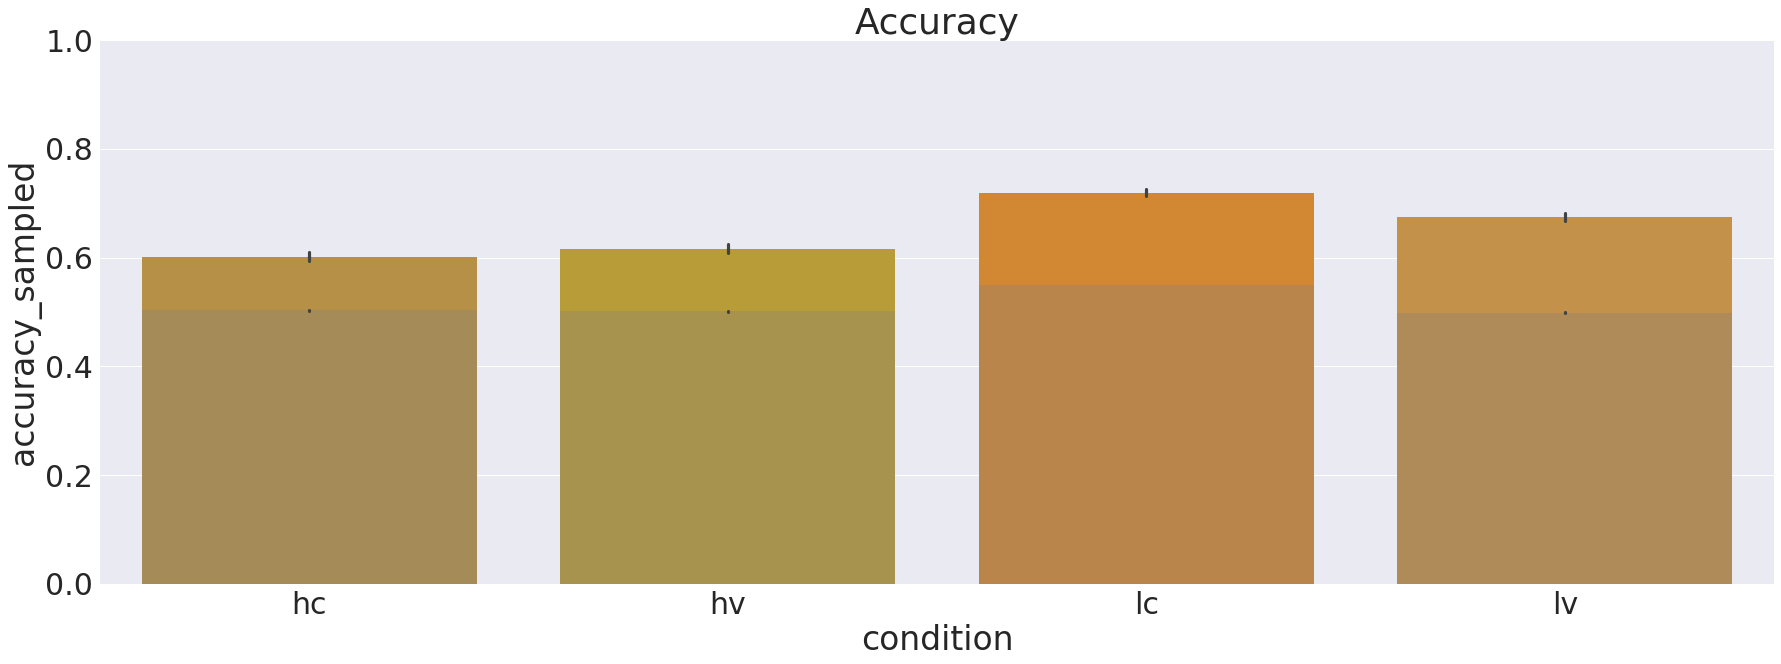

In [252]:
plt.title('Accuracy')
sns.barplot(x='condition', y='accuracy', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000)
sns.barplot(x='condition', y='accuracy_sampled', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000, color='gray', alpha=0.3)
plt.ylim([0,1])
plt.show()

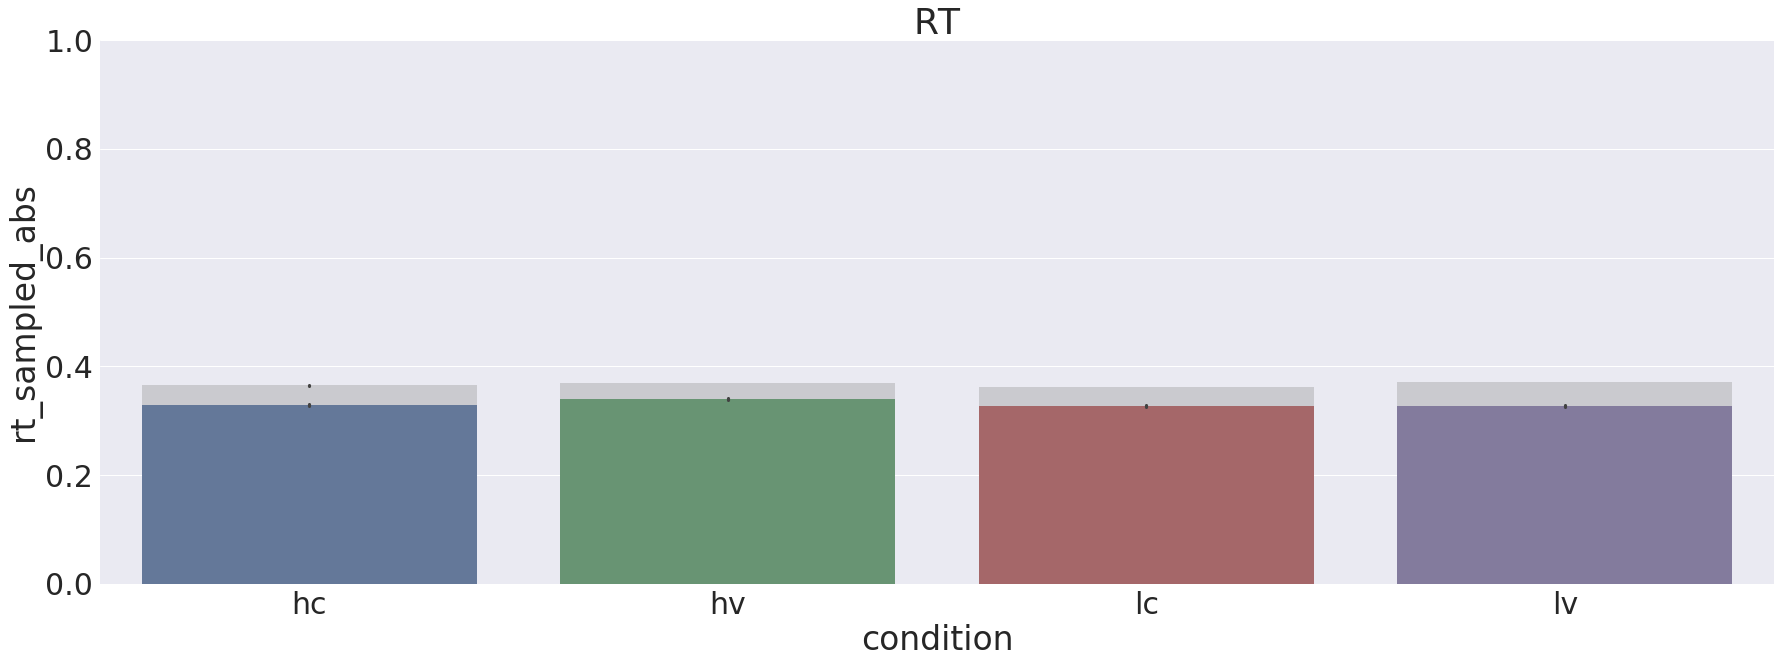

In [245]:
plt.title('RT')
sns.barplot(x='condition', y='rt_sampled_abs', data=ppc_data_t_cpp_v_B, ci=95, n_boot=1000, color='gray', alpha=0.3)
plt.ylim([0,1])
plt.show()

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


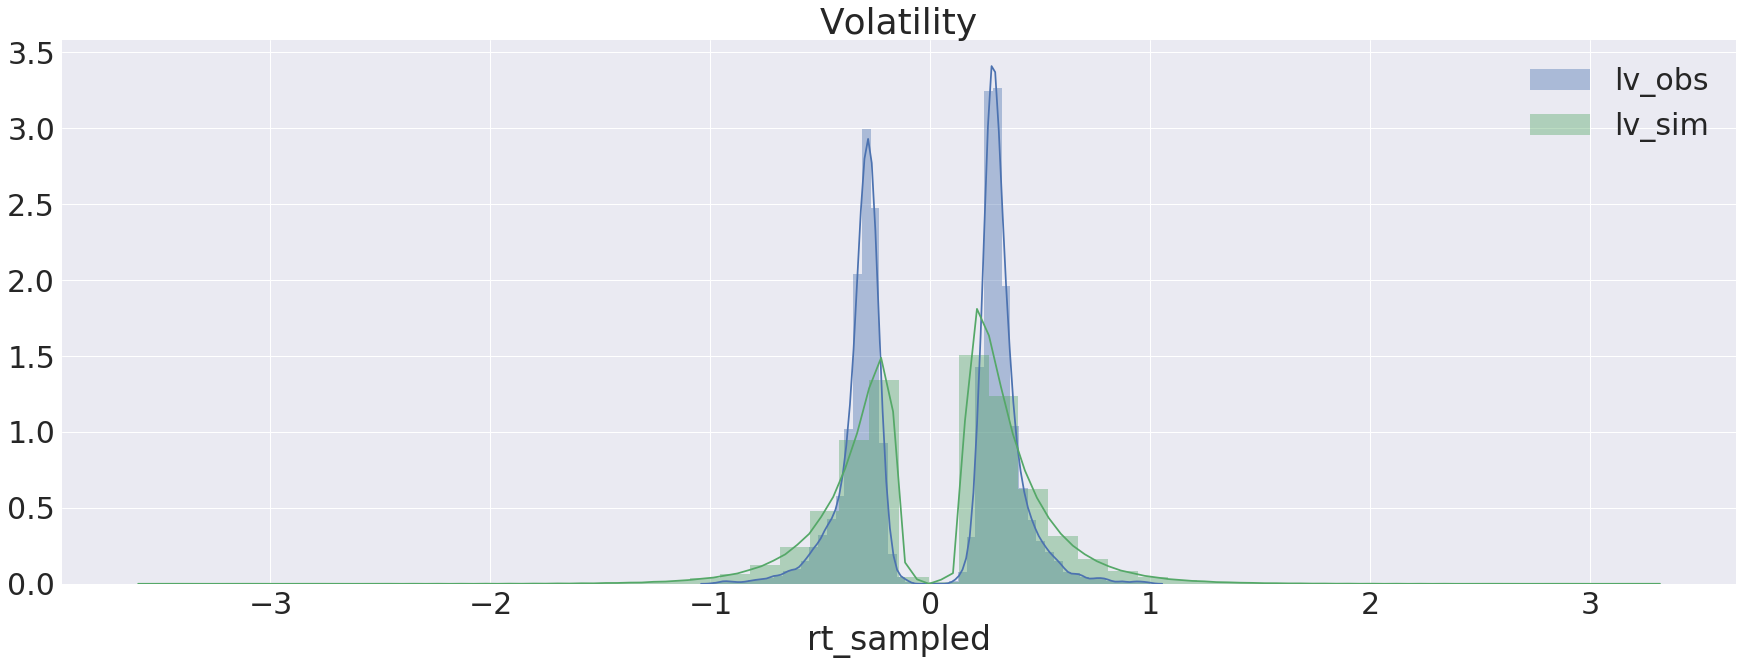

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


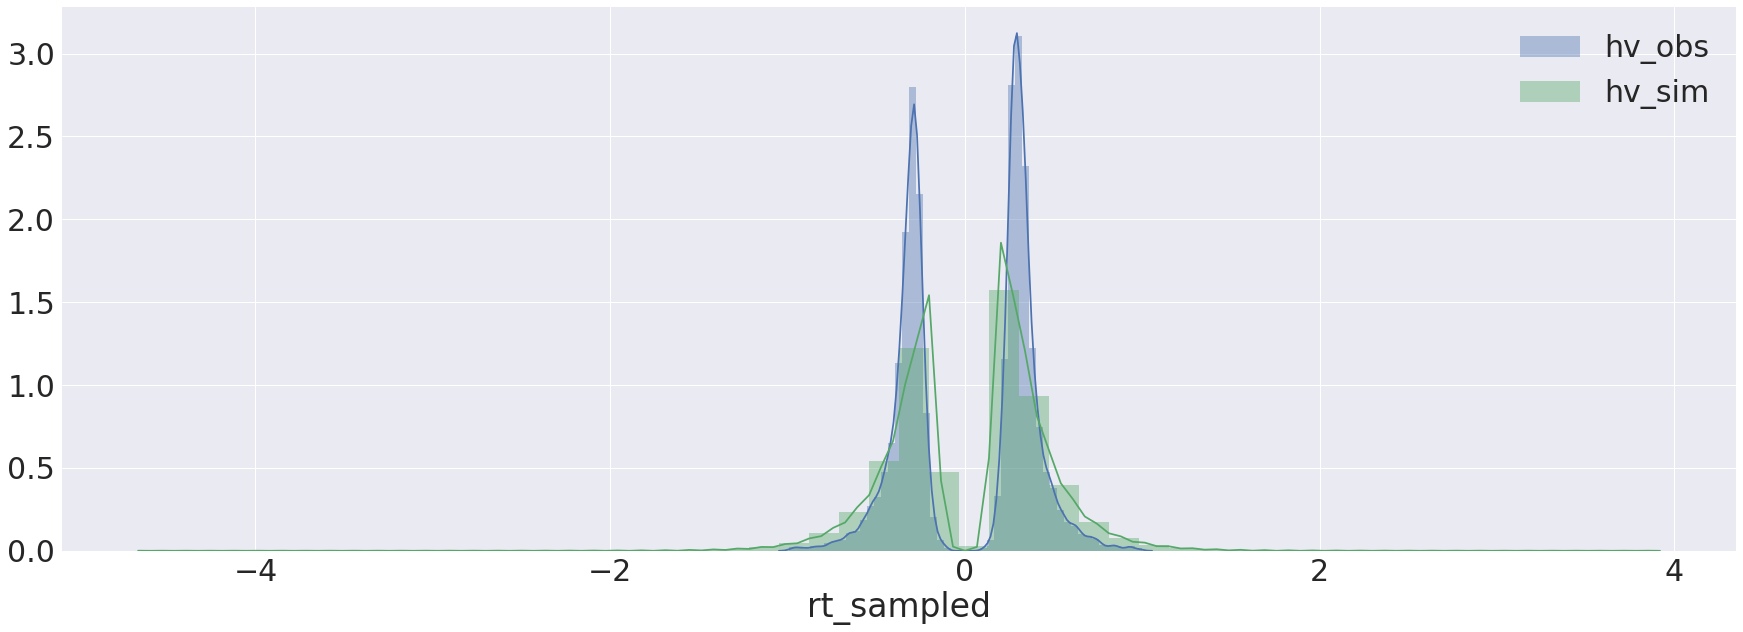

In [251]:
#some simulated rts are very long. may be fixed with greater # samples. 
plt.title('Volatility')
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'lv'], label='lv_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'lv'], label='lv_sim')
plt.legend()
plt.show()
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'hv'], label='hv_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'hv'], label='hv_sim')
plt.legend()
plt.show()

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


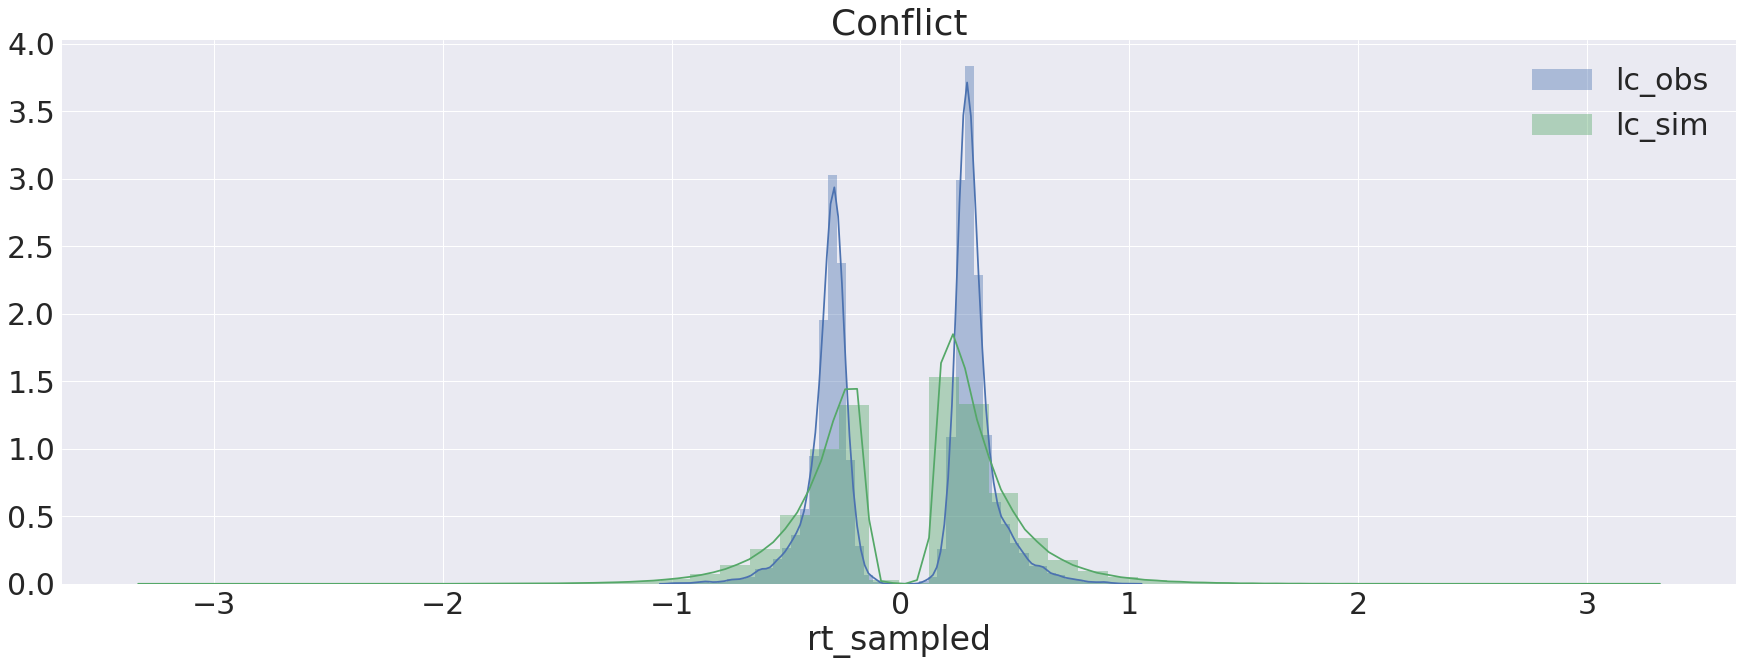

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


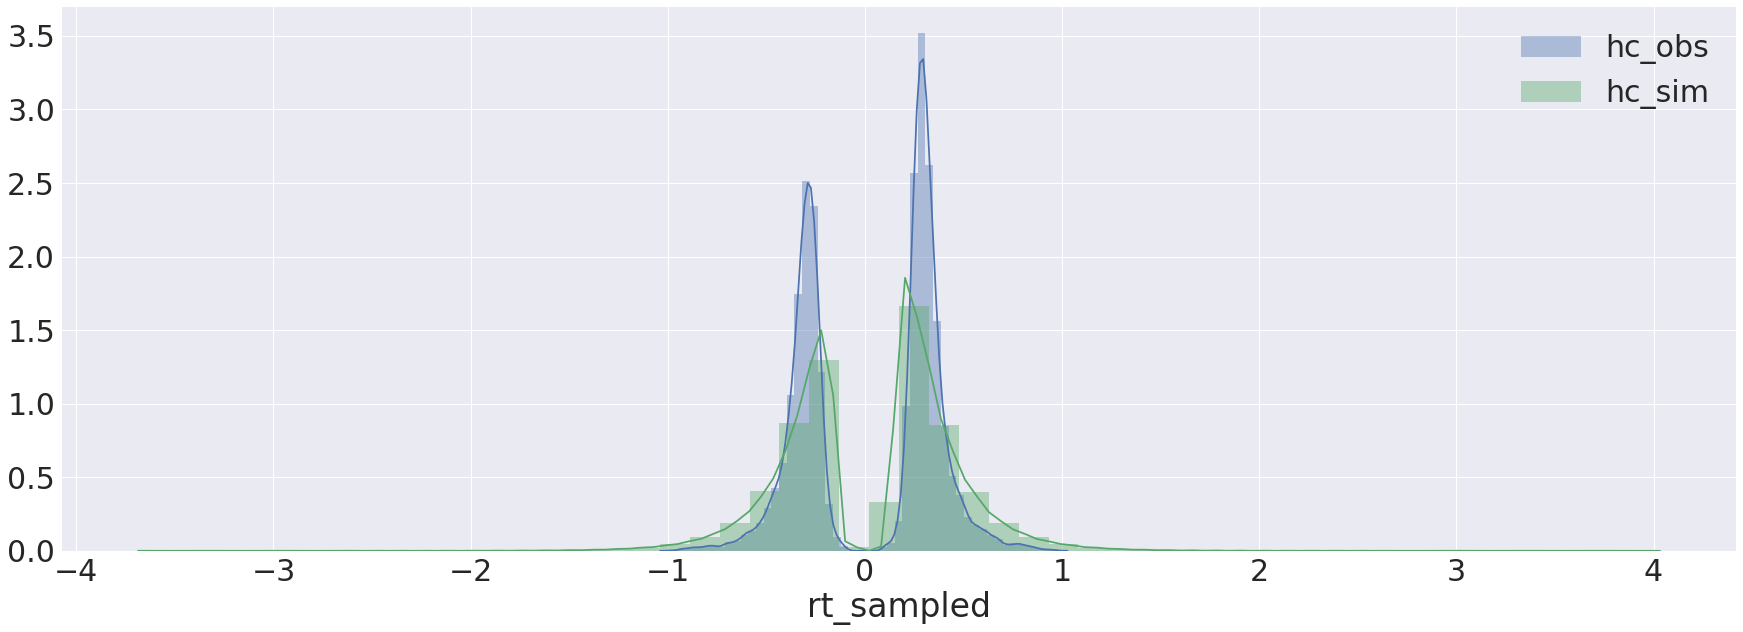

In [250]:
#some simulated rts are very long. may be fixed with greater # samples. 
plt.title('Conflict')
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'lc'], label='lc_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'lc'], label='lc_sim')
plt.legend()
plt.show()
sns.distplot(ppc_data_t_cpp_v_B.rt[ppc_data_t_cpp_v_B.condition == 'hc'], label='hc_obs')
sns.distplot(ppc_data_t_cpp_v_B.rt_sampled[ppc_data_t_cpp_v_B.condition == 'hc'], label='hc_sim')
plt.legend()
plt.show()

In [293]:
sim_real_rts = (ppc_data_t_cpp_v_B.groupby(['condition', 'subj_idx'])[['rt_sampled_abs', 'rt_abs']].median()).reset_index()
sim_real_acc = (ppc_data_t_cpp_v_B.groupby(['condition', 'subj_idx'])[['accuracy_sampled', 'accuracy']].mean()).reset_index()

sim_real_rts_melted = pd.melt(sim_real_rts, id_vars=["condition", "subj_idx"], 
                 var_name="data_type", value_name='rt')
sim_real_acc_melted = pd.melt(sim_real_acc, id_vars=["condition", "subj_idx"], 
                 var_name="data_type", value_name='accuracy')

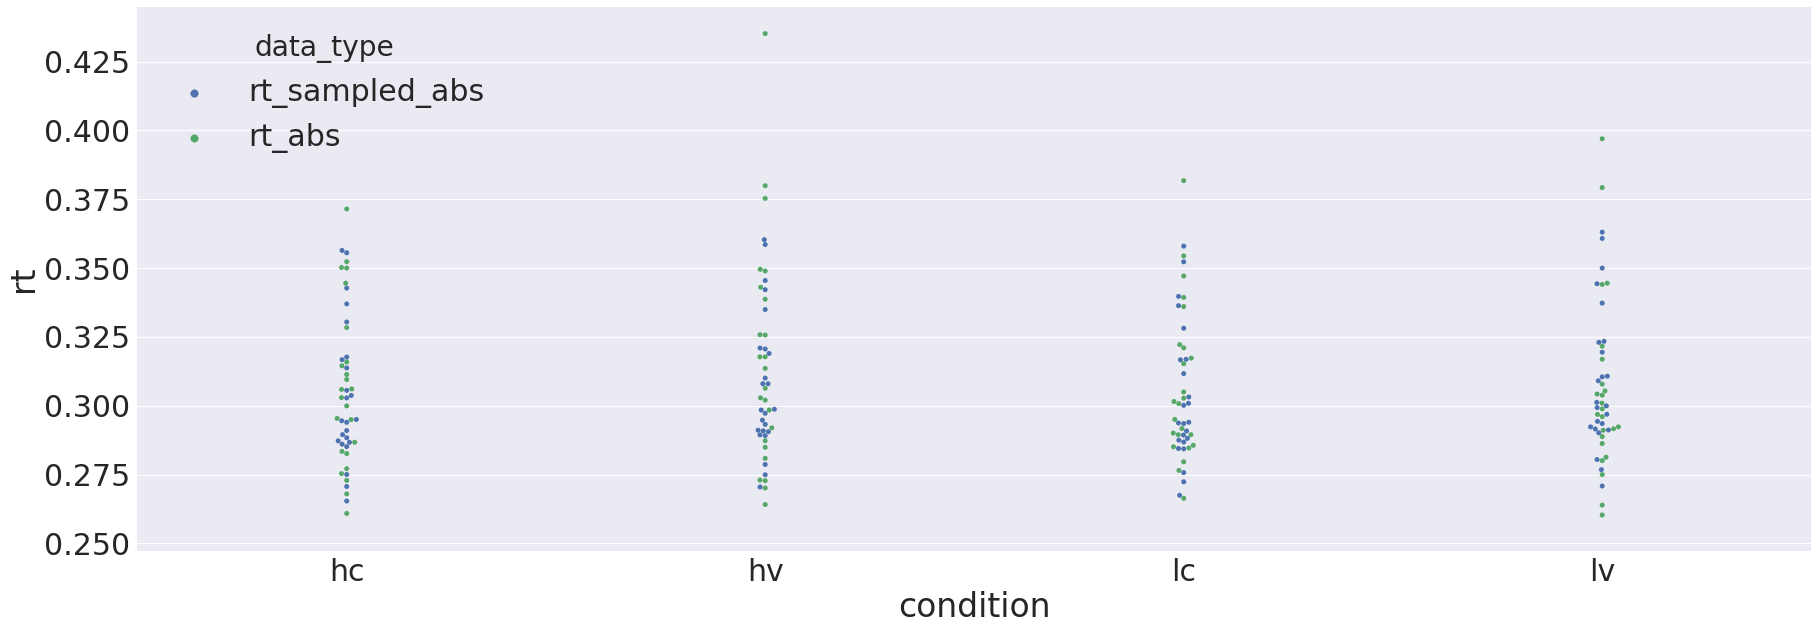

(0, 1)

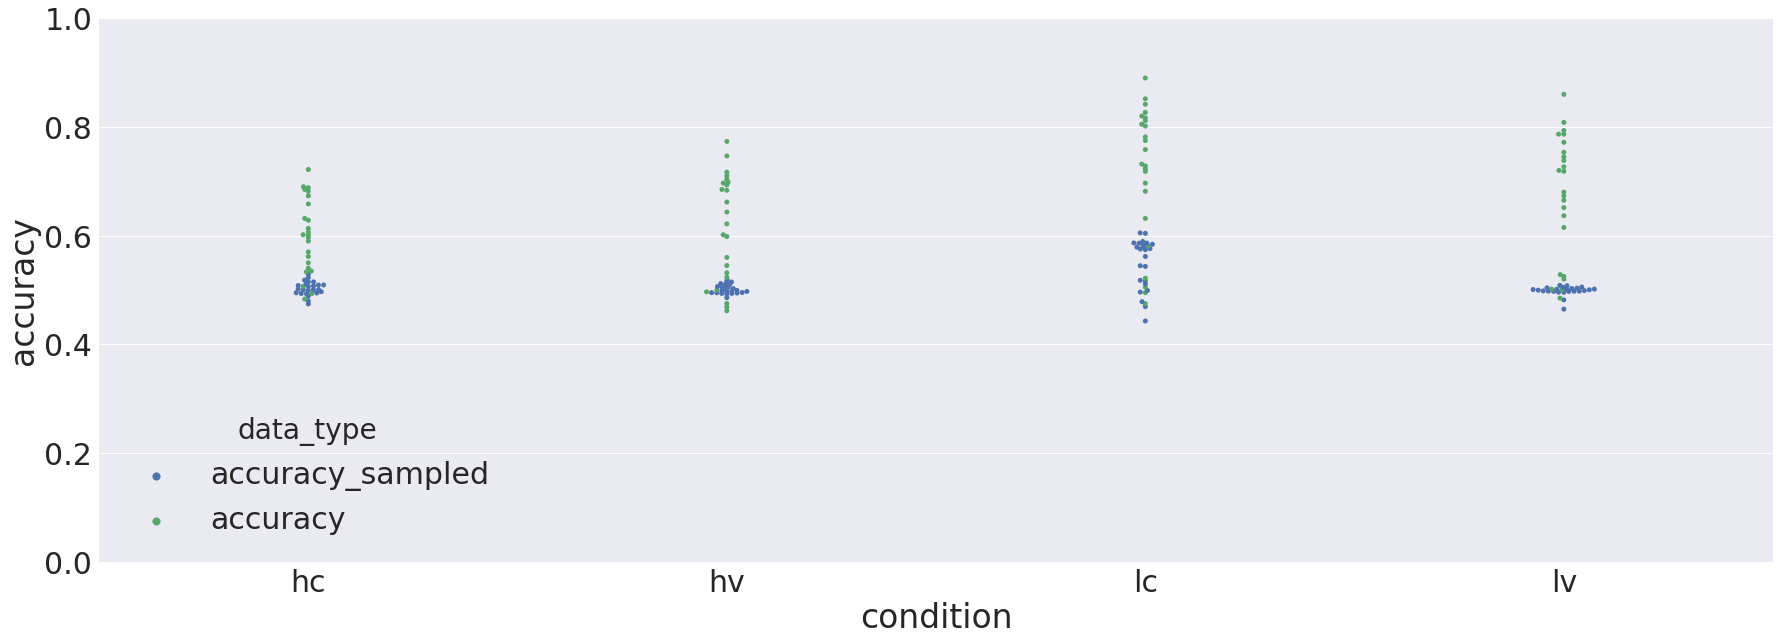

In [294]:
sns.swarmplot(x="condition", y="rt", hue="data_type", data=sim_real_rts_melted)
plt.show()
sns.swarmplot(x="condition", y="accuracy", hue="data_type", data=sim_real_acc_melted)
plt.ylim([0,1])
# plt.legend(frameon=1,loc='best')

In [319]:
lc_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'lc') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]
hc_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'hc') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]

lv_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'lv') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]
hv_rt_sim = sim_real_rts_melted.rt[(sim_real_rts_melted.condition == 'hv') & 
                       (sim_real_rts_melted.data_type == 'rt_sampled_abs')]

In [327]:
lc_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'lc') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]
hc_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'hc') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]

lv_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'lv') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]
hv_acc_sim = sim_real_acc_melted.accuracy[(sim_real_acc_melted.condition == 'hv') & 
                       (sim_real_acc_melted.data_type == 'accuracy_sampled')]

In [333]:
stats.ttest_rel(lc_acc_sim, hc_acc_sim)

stats.ttest_rel(lv_acc_sim, hv_acc_sim)

Ttest_relResult(statistic=-1.0623339604140387, pvalue=0.29911180716660929)

In [311]:
stats.ttest_ind(sampled_rts, real_rts)

0     0.289469
1     0.316698
2     0.302820
3     0.288345
4     0.355541
5     0.275018
6     0.342709
7     0.303713
8     0.293964
9     0.286676
10    0.294982
11    0.286030
12    0.287232
13    0.285133
14    0.290958
15    0.305552
16    0.294524
17    0.336976
18    0.313710
19    0.356381
20    0.265360
21    0.317657
22    0.270651
23    0.330392
Name: rt, dtype: float64

In [297]:
from scipy import stats 

#accept null 
stats.ttest_ind(sampled_rts, real_rts)


Ttest_indResult(statistic=-0.72364926943473584, pvalue=0.47017107775746569)

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')